<a href="https://colab.research.google.com/github/Shaurya6355/BITS-464-ML-ASSIGNMENTS/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
from math import sqrt
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Q1

# Q2

In [2]:
from sklearn import datasets


In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
x=iris.data[:,:]
y=iris.target

In [6]:
#Features and attributes in iris dataset
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Total number of classes=3
# 0-sentosa,1-versicolor,2-virginica
classes=np.array(iris.target)
classes=np.unique(classes)

print(classes)
print(iris.target_names)

[0 1 2]
['setosa' 'versicolor' 'virginica']


In [ ]:
c = np.c_[x, y]
c

In [12]:
# creating a list of column names
column_values = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','Class']
  
# creating the dataframe
df = pd.DataFrame(data = c,columns = column_values)

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [15]:
print('Class  Number of Data Instances')
print(df['Class'].value_counts())

Class  Number of Data Instances
0.0    50
1.0    50
2.0    50
Name: Class, dtype: int64


In [16]:
#splitting Iris dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.20,shuffle=True)

In [17]:
X_train.shape

(120, 4)

In [18]:
print('Number of Data Instances used in Training:')
print('\n')
unique, frequency = np.unique(y_train,return_counts = True)
count = np.asarray((unique,frequency )).T
print(pd.DataFrame(data=count,columns=['Class','Number of Data instances']))
print('\n')
print('\n')
print('Number of Data Instances used in Testing:')
print('\n')
unique, frequency = np.unique(y_test,return_counts = True)
count = np.asarray((unique,frequency )).T
print(pd.DataFrame(data=count,columns=['Class','Number of Data instances']))





Number of Data Instances used in Training:


   Class  Number of Data instances
0      0                        40
1      1                        41
2      2                        39




Number of Data Instances used in Testing:


   Class  Number of Data instances
0      0                        10
1      1                         9
2      2                        11


In [19]:
data=np.c_[X_train, y_train]
print(data.shape)

(120, 5)


In [20]:
def euclidean_dist(x1,x2):
  distance=0.0
  for i in range(len(x1)-1):
    distance+=(x1[i]-x2[i])**2

  return sqrt(distance)


In [21]:
def nearest_neighbours(train,test_row,k):
  distances=[]
  for train_row in train:
    dist=euclidean_dist(train_row,test_row)
    distances.append((train_row,dist))
  distances.sort(key=lambda x: x[1])
  neighbours=[]
  for i in range(k):
    neighbours.append(distances[i][0])
  return neighbours


In [22]:
def classificationPrediction(train_data,test,num_neighbours):
  predictions=[]
  
  for test_row in test:
    neighbours=nearest_neighbours(train_data,test_row,num_neighbours)
    output_values=[row[-1] for row in neighbours]
    prediction=max(set(output_values),key=output_values.count)
    predictions.append(prediction)
          
  return predictions
  

In [24]:
kf=KFold(n_splits=3,shuffle=True)
f1_tot=[]
score=[]
for k in range(1,26):
  
  for train_index, val_index in kf.split(data):

    train_data,val_data = data[train_index], data[val_index]
    val_true=val_data[:,-1]
    val_true=val_true.squeeze()
    val_data= np.delete(val_data, -1, axis=1)

    predictions=np.array(classificationPrediction(train_data,val_data,k))
    
    score=np.append(score,f1_score(val_true,predictions,average='macro'))

  f1=np.mean(score)
  score=np.delete(score,[0,1,2])
  f1_tot.append(f1)


  
    

    
    

  
  
  

In [ ]:
f1_tot

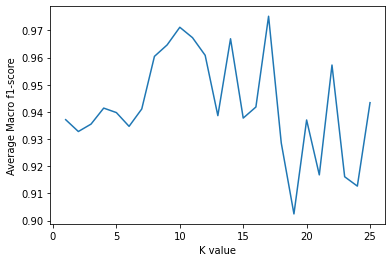

In [30]:

x = range(1,26)

y = f1_tot
  

plt.plot(x, y)
  
# naming the x axis
plt.xlabel('K value')
# naming the y axis
plt.ylabel('Average Macro f1-score')
  
plt.show()

In [43]:
max_f1_value = max(f1_tot)
index = f1_tot.index(max_f1_value)
k_best=index+1

data_test=np.c_[X_test, y_test]

test_predictions=np.array(classificationPrediction(data,X_test,k_best))

print("MODEL EVALUATION")
print("f1_score for testing: ",f1_score(y_test,test_predictions,average='macro'))
print("Accuracy for testing: ",accuracy_score(y_test,test_predictions))
print("Precision for testing: ",precision_score(y_test,test_predictions,average='macro'))
print("Recall for testing: ",recall_score(y_test,test_predictions,average='macro'))




MODEL EVALUATION
f1_score for testing:  1.0
Accuracy for testing:  1.0
Precision for testing:  1.0
Recall for testing:  1.0
